# Importing Libraries

In [17]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading the dataset and displaying the entries

In [3]:
#Loading the dataset into pandas dataframe
df = pd.read_csv('Datasets/2019.csv')

#Displaying the first five entries of the dataset
df.head() 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
#Displaying the last 3 entries of the dataset
df.tail(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


# Preparing the data

In [5]:
#Finding out the total number of rows and columns contained in the dataset 
df.shape

(156, 9)

In [6]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


# Arrange Data into Features Matrix and Target Vector

In [69]:
#Features Matrix
#Convert Column X to NumPy array
X = df.loc[:, ['GDP per capita', 'Social support',
               'Healthy life expectancy', 'Freedom to make life choices',
               'Generosity', 'Perceptions of corruption']].values
#Features Matrix needs to be 2-dimensional
X.shape 

(156, 6)

In [70]:
#Target Vector
y = df.loc[:, 'Score'].values
y.shape

(156,)

# Train-Test Split

In [71]:
#Splitting the data randomly into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [72]:
#Number of rows and columns in X_train
print(X_train.shape)

(117, 6)


In [73]:
#Number of rows and columns in X_test
print(X_test.shape)

(39, 6)


In [74]:
#Number of rows and columns in y_train
print(y_train.shape)

(117,)


In [75]:
#Number of rows and columns in y_test
print(y_test.shape)

(39,)


# Linear Regression Model

In [85]:
#Making an instance of the linear regression model
linear_regression_model = LinearRegression(fit_intercept=True)

#Using the fit method to train the model on the training data
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [86]:
#Predicting values for multiple observations
linear_regression_model.predict(X_test[0:38])

array([4.7876984 , 6.81734258, 5.81301002, 4.45985913, 6.792115  ,
       6.02911953, 3.37980899, 6.78647172, 5.77015718, 5.63848837,
       6.12839521, 3.84042898, 5.15519935, 3.83157051, 5.95265598,
       5.80675929, 5.71287439, 5.70843114, 4.09493504, 4.744271  ,
       4.25110654, 4.49122616, 5.48589707, 5.4188565 , 5.68694546,
       6.8946639 , 5.54298545, 3.32800393, 4.83927814, 6.75108856,
       5.07800534, 6.15794897, 6.53463458, 6.04784309, 5.48711696,
       3.98854015, 6.79762603, 6.00683618])

# Finding the regression equation for the line

In [87]:
#Slope of the line
linear_regression_model.coef_

array([0.70235814, 1.07300369, 1.05407642, 1.66020688, 0.19673152,
       0.68420628])

In [88]:
#Intercept of the line
linear_regression_model.intercept_

1.8924863727686985

In [89]:
#Equation of the line in Slope-Intercept Form
m = linear_regression_model.coef_[0]
b = linear_regression_model.intercept_
print("Equation of the line in Slope-Intercept Form: ")
print ("y = ", m, "x + ", b)

Equation of the line in Slope-Intercept Form: 
y =  0.7023581388522437 x +  1.8924863727686985


# Plotting Linear Regression Lines & Data Distributions

## GDP per capita vs Score 

Text(0.5, 0.98, 'GDP per capita vs Score')

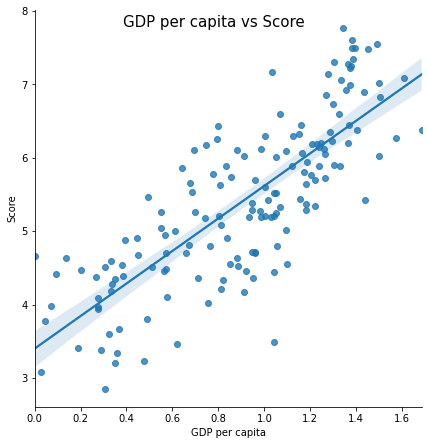

In [90]:
sns.pairplot(df, x_vars='GDP per capita', y_vars='Score', height=6, kind='reg')
plt.suptitle("GDP per capita vs Score", fontsize=15)

## Social support vs Score 

Text(0.5, 0.98, 'Social support vs Score')

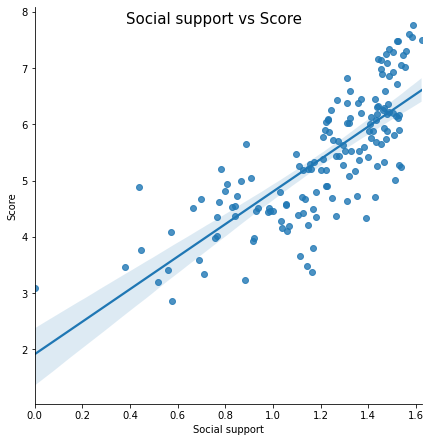

In [91]:
sns.pairplot(df, x_vars='Social support', y_vars='Score', height=6, kind='reg')
plt.suptitle("Social support vs Score", fontsize=15)

## Healthy life expectancy vs Score

Text(0.5, 0.98, 'Healthy life expectancy vs Score')

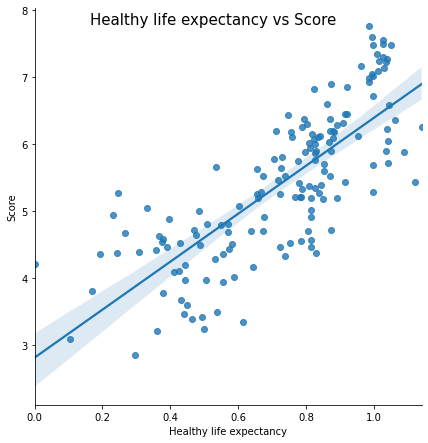

In [92]:
sns.pairplot(df, x_vars='Healthy life expectancy', y_vars='Score', height=6, kind='reg')
plt.suptitle("Healthy life expectancy vs Score", fontsize=15)

## Freedom to make life choices vs Score

Text(0.5, 0.98, 'Freedom to make life choices vs Score')

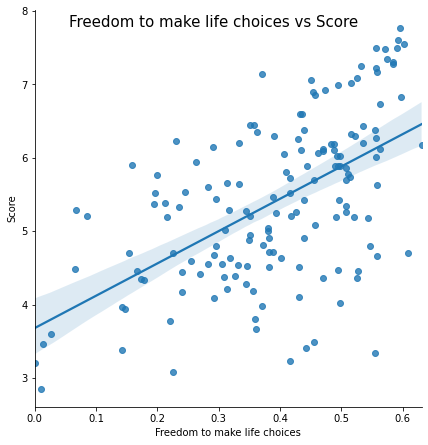

In [93]:
sns.pairplot(df, x_vars='Freedom to make life choices', y_vars='Score', height=6, kind='reg')
plt.suptitle("Freedom to make life choices vs Score", fontsize=15)

## Generosity vs Score

Text(0.5, 0.98, 'Generosity vs Score')

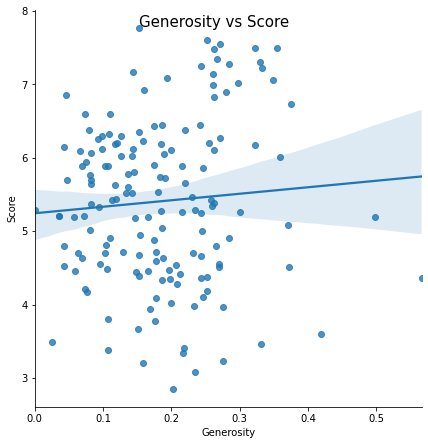

In [94]:
sns.pairplot(df, x_vars='Generosity', y_vars='Score', height=6, kind='reg')
plt.suptitle("Generosity vs Score", fontsize=15)

## Perceptions of corruption vs Score 

Text(0.5, 0.98, 'Perceptions of corruption vs Score')

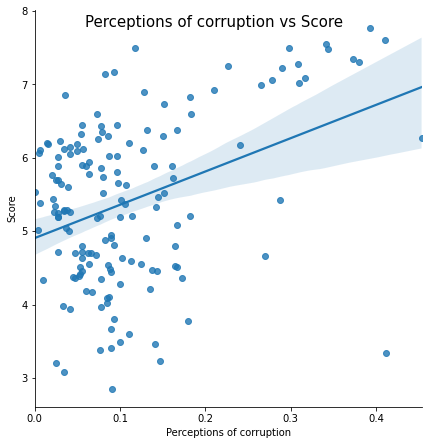

In [95]:
sns.pairplot(df, x_vars='Perceptions of corruption', y_vars='Score', height=6, kind='reg')
plt.suptitle("Perceptions of corruption vs Score", fontsize=15)

# Measuring Model Performance

In [98]:
#Test the model on the testing set and evaluate the performance using R square
score = linear_regression_model.score(X_test, y_test)
print(score)

0.8360130969235973


In [99]:
#Using Mean Squared Error Method
y_predict = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_predict, y_test)
math.sqrt(mse)

0.484539906686719

# Correlation Co-efficients and Heatmap

In [100]:
#Correlation co-efficients
df.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


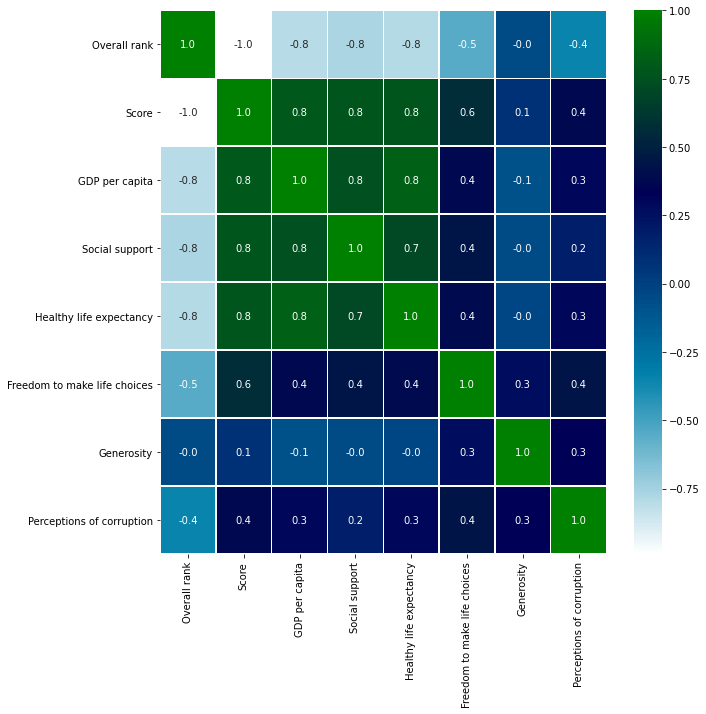

In [101]:
#Correlation Map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="ocean_r", fmt= '.1f',ax=ax)

# Future Works

## Data binning 

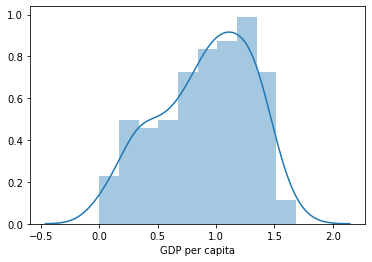

In [102]:
#Creating a standard histogram to understand the distribution of data
# And customizing the number of bins
sns.distplot(df['GDP per capita'], bins=10)
plt.show()

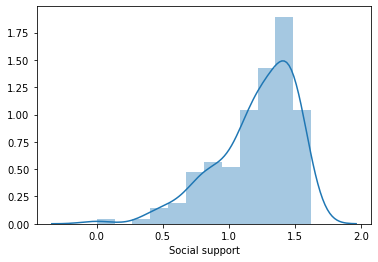

In [103]:
sns.distplot(df['Social support'], bins = 12)
plt.show()

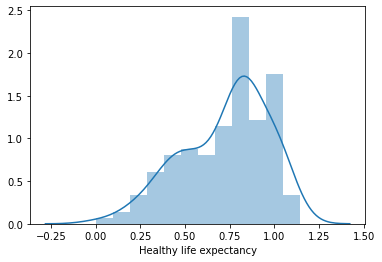

In [104]:
sns.distplot(df['Healthy life expectancy'], bins = 12)
plt.show()

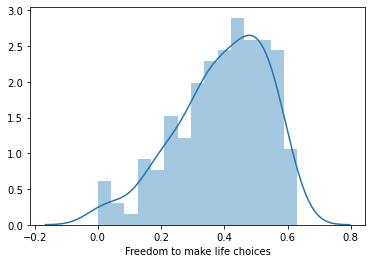

In [105]:
sns.distplot(df['Freedom to make life choices'], bins = 15)
plt.show()

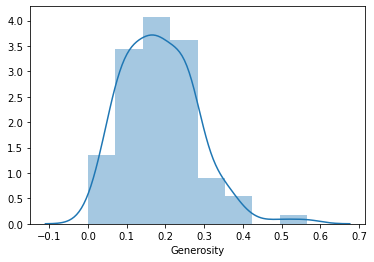

In [106]:
sns.distplot(df['Generosity'], bins = 8)
plt.show()

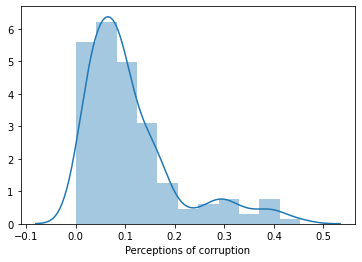

In [107]:
sns.distplot(df['Perceptions of corruption'], bins = 11)
plt.show()